# AB-тестирование
## Задание AB.1


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.

**Баллы за задание:**

* Задача 1 — 10 баллов
* Задача 2 — 10 баллов
* Задача 3 — 30 баллов
* Задача 4 — 40 баллов
* Задача 5 — 60 баллов
* Задача 6 — 60 баллов




**Важность задач:**

* *высокая:* задачи 1, 2, 3, 5, 6;
* *средняя:* задача 4.


----


In [1]:
# Bot check

# HW_ID: ds_ab1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from statsmodels.stats.proportion import proportion_confint
import scipy.stats as stats
import seaborn as sns
sns.set(style='whitegrid', palette='Set2')

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- b3d4a8d1eb3329088705105755e44228 -->
---
### Задача 1

Проверьте, отличается ли средний балл студентов 3 курса DS-потока за задания SP.9 и SP.10 осенью 2024. Не забывайте статистическую значимость и про визуализацию

Вытащу из таблицы успеваемости сами оценки. Оставлю только оцененные домашки.

In [3]:
rates_9 = np.array([
    149.5, 197.5, 170.5, 112, 180.5, 149.5, 189.5, 154.5, 195.5, 0,
    190.5, 177.5, 172.5, 155.5, 93, 0, 137.5, 155.5, 165.5, 170.5, 0,
    167.5, 139.5, 142.5, 180.5, 0, 180.5, 139.5, 97.5, 147.5, 155.5,
    169.5, 195.5, 0, 150.5, 167.5, 156.5, 190.5, 0, 0, 180.5, 182, 0,
    183.5, 142.5, 0, 167.5, 0, 195.5, 0, 93, 97.5, 175.5, 194.5, 190
])

rates_10 = np.array([
    150, 206, 170, 145, 125, 175, 170, 135, 178, 40,
    200, 138, 102, 108, 38, 96, 95, 63, 128, 128, 43,
    158, 135, 192, 187, 0, 175, 175, 0, 101, 210, 168,
    145, 95, 150, 102, 143, 213, 106, 0, 186, 0, 0, 212,
    165, 0, 95, 25, 105, 0, 75, 0, 103, 111, 195
])

rates_9 = rates_9[rates_9 > 0]
rates_10 = rates_10[rates_10 > 0]

Проведем t-test, две выборки независимы и достаточно большие.

In [4]:
stat, pval = sps.ttest_ind(rates_9, rates_10)
alpha = 0.05

print('Результаты проверки H_0: средние оценки равны')
print(f'''p-value критерия: {np.round(pval, 4)}''')
print(f'''Отвергаем ли гипотезу — {pval < alpha}''')

Результаты проверки H_0: средние оценки равны
p-value критерия: 0.0031
Отвергаем ли гипотезу — True


Визуализация

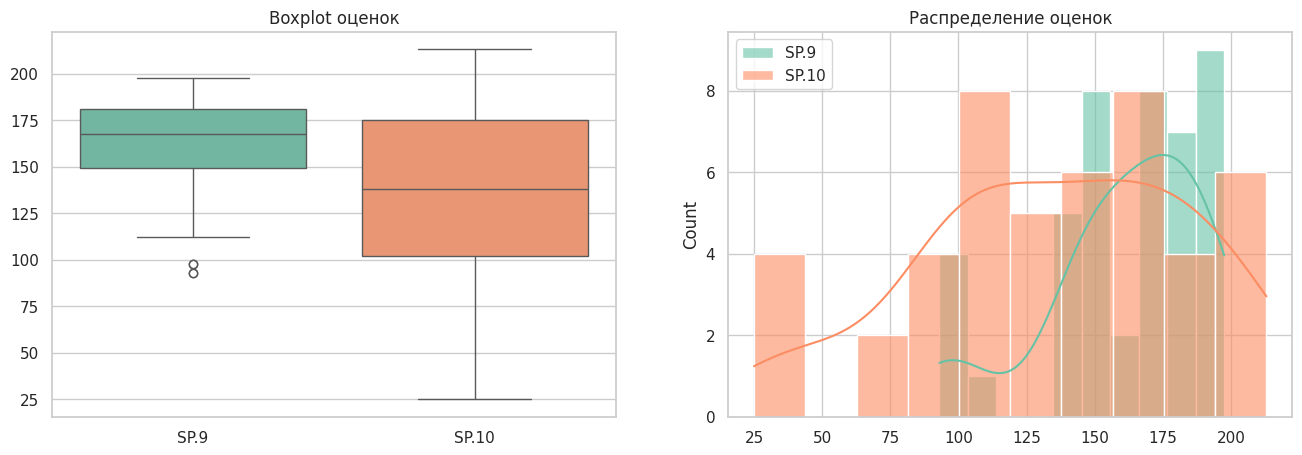

In [5]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=[rates_9, rates_10])
plt.xticks([0, 1], ["SP.9", "SP.10"])
plt.title("Boxplot оценок")

plt.subplot(1, 2, 2)
sns.histplot(rates_9, bins=10, kde=True, label="SP.9", alpha=0.6)
sns.histplot(rates_10, bins=10, kde=True, label="SP.10", alpha=0.6)
plt.legend()
plt.title("Распределение оценок")

plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- ff0cc37c6787849d70478b7517a990e5 -->

Сделайте выводы.

Различие среднего балла за SP.9 и SP.10 статистически значимо.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 8b4ea08a662239177ff6f88e780d4f0e -->
---
### Задача 2
Рассмотрите таблицу с оценками по какому-либо курсу с несколькими семинарскими группами. Выберите свою группу и еще какую-нибудь. Проверьте гипотезу о том, что средний балл не отличается между семинарскими группами. Не забывайте про визуализацию.

Оценки по курсу ТАМВ в Б05-205 (моя группа) и Б05-208

In [6]:
group_205 = np.array([3, 9, 10, 8, 5, 9, 5, 3, 6, 6, 7, 3, 8, 2, 7, 8])
group_208 = np.array([7, 6, 7, 8, 9, 5, 2, 5, 9, 5, 2, 2, 8, 6])

Проведем тест

In [7]:
stat, pval = sps.ttest_ind(group_205, group_208)
alpha = 0.05

print('Результаты проверки H_0: средние оценки равны')
print(f'''p-value критерия: {np.round(pval, 4)}''')
print(f'''Отвергаем ли гипотезу — {pval < alpha}''')

Результаты проверки H_0: средние оценки равны
p-value критерия: 0.6601
Отвергаем ли гипотезу — False


Визуализация

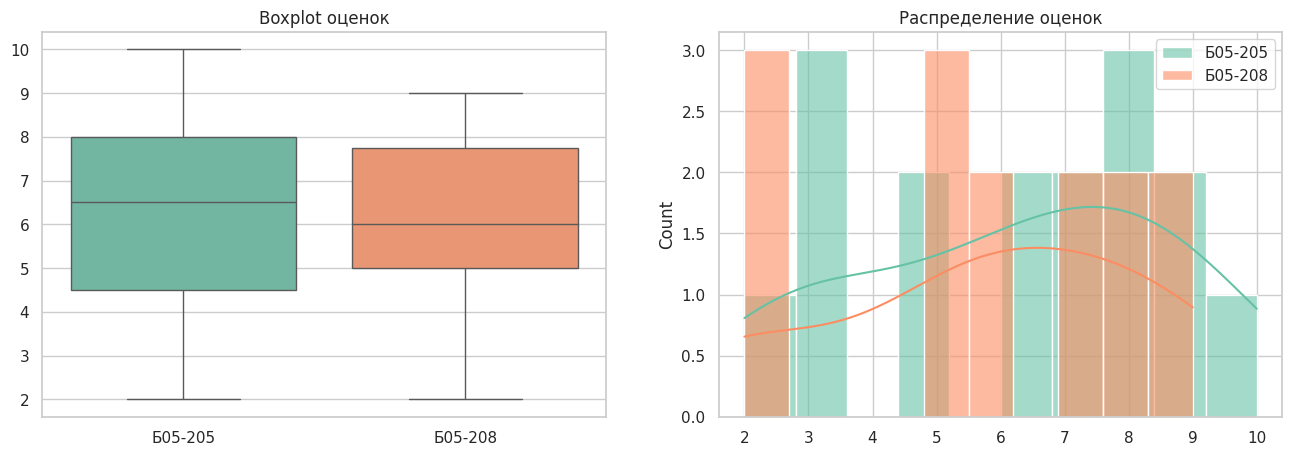

In [8]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=[group_205, group_208])
plt.xticks([0, 1], ["Б05-205", "Б05-208"])
plt.title("Boxplot оценок")

plt.subplot(1, 2, 2)
sns.histplot(group_205, bins=10, kde=True, label="Б05-205", alpha=0.6)
sns.histplot(group_208, bins=10, kde=True, label="Б05-208", alpha=0.6)
plt.legend()
plt.title("Распределение оценок")

plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 732d6e08159252b09583684a5e1eab41 -->
Сделайте выводы.

Различие среднего балла по курсу ТАМВ между группами Б05-205 и Б05-208 статистически незначимо.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- a09e6676ed4b3c7a3d9ea521aebef359 -->
---
### Задача 3

Пусть $X=(X_1, ..., X_n)$ и $Y=(Y_1, ..., Y_n)$ — независимые выборки *одинакового* размера. Выведите сходимость статистики *относительного* t-test'а с помощью дельта-метода.

Статистика теста

$$R = R(\overline X, \overline Y) = \frac{\overline X - \overline Y}{\overline Y}$$

Из ЦПТ имеем:

$$\sqrt{n} \left( \begin{pmatrix} \bar{X} \\ \bar{Y} \end{pmatrix} - \begin{pmatrix} \mu_X \\ \mu_Y \end{pmatrix} \right) \xrightarrow{d} \mathcal{N} \left( 0, \begin{pmatrix} \sigma_X^2 & 0 \\ 0 & \sigma_Y^2 \end{pmatrix} \right)$$

Рассмотрим функцию:

$$\tau(x, y) = \frac{x - y}{y}$$

Имеем:
$$\nabla \tau^T(x, y) = \left( \frac{1}{y}, -\frac{x}{y^2}\right)$$

Заметим, что

$$\tau(\overline X, \overline Y) = R$$

Осталось найти ассимптотическую дисперсию (величины $R$) по дельта-методу:

$$\sigma_R^2 = \nabla \tau^T(\mu_X, \mu_Y) \begin{pmatrix} \sigma_X^2 & 0 \\ 0 & \sigma_Y^2 \end{pmatrix} \nabla \tau(\mu_X, \mu_Y) = \frac{\sigma_X^2}{\mu_Y^2} + \frac{\sigma_Y^2 \mu_X^2}{\mu_Y^4}$$

По лемме Слуцкого (оценки дисперсии и среднего состоятельны) получаем, что:

$$\sqrt n \left( \frac{R}{\hat \sigma_R}\right) \xrightarrow{d} \mathcal{N}(0, 1)$$

где

$$\hat \sigma_R^2 = \frac{\hat \sigma_X^2}{\hat \mu_Y^2} + \frac{\hat \sigma_Y^2 \hat \mu_X^2}{\hat \mu_Y^4}$$

Матожидание ($\mu_I$) мы оцениваем выборочным средним, а дисперсию ($\sigma_I^2$) - несмещенной оценкой дисперсии. Требуемое доказано

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3ee9dd1ccd0ec0fbc179dc6ce39cc792 -->
---
### Задача 4

Пусть $X=(X_1, ..., X_n)$ и $Y=(Y_1, ..., Y_m)$ — нормальные выборки с одинаковой неизвестной дисперсией, возможно, *разного* размера. Докажите что статистика *абсолютного* t-test'а имеет распределение Стьюдента с $n-m-2$ степенями свободы.

*Указание.* Воспользуйтесь теоремой об ортогональном разложении гауссовского вектора.

Дисперсии одинаковы и равны $\sigma^2$, предполагая независимость, имеем
$$ Z = (X, Y)^T = (X_1, \ldots, X_n, Y_1, \ldots, Y_m)^T \sim N(a, I \sigma^2)$$
$$ a = (\mu_X, \ldots, \mu_X, \mu_Y, \ldots, \mu_Y)^T$$

Проецируем $Z$ на линейное пространство $L = \text{Lin} \{(1,\ldots, 1, 0, \ldots, 0), (0, \ldots, 0, 1, \ldots, 1)\}$. Тогда проекция $\text{proj}_L(Z)$ соответствует минимуму расстояния 
$$||(X, Y)^T - u(1,\ldots, 1, 0, \ldots, 0) - v (0, \ldots, 0, 1, \ldots, 1) ||^2$$
$$u, v \in \mathbb R$$

Ясно, что минимум достигается при $u = \overline X, v = \overline Y$ (из свойства дисперсии), откуда проекция на $L$:

$$\text{proj}_L(Z) = (\overline X, \ldots, \overline X, \overline Y, \ldots, \overline Y)$$


Проекция на ортогональное дополенение к $L$ есть $Z - \text{proj}_L(Z) = (X - \overline X, Y - \overline Y)$. Отсюда по теореме о разложении гауссовского вектора имеем (и по ЗБЧ):
$$\frac{1}{\sigma^2} || Z - \text{proj}_L(Z) - \mathbb E(Z - \text{proj}_L(Z))||^2 = \frac{1}{\sigma^2}||(X - \overline X, Y - \overline Y)||^2 \sim \chi^2_{n + m - 2}$$

Имеем (через несмещенную дисперсию):

$$||(X - \overline X, Y - \overline Y)||^2 = \sum_i (X_i - \overline X)^2 + \sum_j (Y_j - \overline Y)^2 = (n-1)S_X^2 + (m-1)S_Y^2$$

Тогда для определенной ниже величины $S$ имеем:

$$S^2 = \frac{(n-1)S_X^2 + (m-1)S_Y^2}{n+m-2}$$

$$\frac{(n+m-2) S^2}{\sigma^2} \sim \chi^2_{n + m - 2}$$

По свойствам нормального распределения:
$$\overline X \sim N(\mu_X, \sigma^2 / n)$$
$$\overline Y \sim N(\mu_Y, \sigma^2 / m)$$
Откуда (по тем же свойствам, естественно, используя независимость):
$$\overline X - \overline Y \sim N(\mu_X - \mu_Y, \sigma^2 (1/n + 1/m))$$
$$\frac{\overline X - \overline Y - (\mu_X - \mu_Y)}{\sigma \sqrt{1/n + 1/m}} \sim N(0, 1)$$

По теореме о разложении, $(\overline X, \overline Y)$ и $(X - \overline X, Y - \overline Y)$ независимы, а значит и линейные комбинации тоже, а значит и $\overline X - \overline Y$ и $S^2$ тоже. Итого по определению распределения Стьюдента имеем:

$$\frac{\frac{\overline X - \overline Y - (\mu_X - \mu_Y)}{\sigma \sqrt{1/n + 1/m}}}{\sqrt{\frac{(n+m-2) S^2}{(n+m-2)\sigma^2}}} = \frac{\overline X - \overline Y - (\mu_X - \mu_Y)}{S \sqrt{1/n + 1/m}} \sim t_{n+m-2}$$

При $H_0$: $\mu_X = \mu_Y$ поэтому статистика 
$$T = \frac{\overline X - \overline Y}{S \sqrt{1/n + 1/m}} \sim t_{n+m-2}$$
имеет требуемое распределение (в условии опечатка, $+m$ а не $-m$)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- b46c1240cf4742b0568baaeb94cdc0eb -->
---
### Задача 5

Рассмотрим данные по транзакциям одного из интернет-магазинов: https://www.kaggle.com/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo

Скачайте данные и оставьте колонки:
* `Quantity` &mdash; количество данной единицы товара в чеке.
* `InvoiceDate` &mdash; дата и время покупки.
* `UnitPrice` &mdash; цена одной единицы товара.
* `CustomerID` &mdash; уникальный идентификатор клиента.

In [9]:
data = pd.read_excel("Online Retail.xlsx", parse_dates=["InvoiceDate"])
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Магазин хочет провести AB-тест в течение двух месяцев для оценки значимости эффекта от нового блока умных рекомендаций и использовать для этого *относительный* t-test. Ожидается, что новый блок рекомендаций увеличит общую выручку. На время тестирования решено выкатить блок рекомендаций на случайную группу из 300 пользователей.

**1.**
На искусственных данных мы уже проверили наш тест на занятии, теперь пора проверить на реальных. На данных за апрель и май проведите множество случайных AA-тестов для оценки вероятности ошибки I рода, выбирая случайных пользователей в каждую из групп. Использовать нужно группы одинакого размера, и, конечно же, они не должны пересекаться. Для каждого пользователя рассматриваем общую сумму его покупок за два месяца.

Выбираю данные за апрель и май. Как видно, данные за эти месяцы только в одном году

In [10]:
data_apr_may = data[(data["InvoiceDate"].dt.month.isin([4, 5]))]

customer_spending_apr_may = (
    data_apr_may.groupby("CustomerID")[["Quantity", "UnitPrice"]]
    .apply(lambda x: (x["Quantity"] * x["UnitPrice"]).sum())
    .reset_index(name="TotalSpent")
)
#customer_spending_apr_may = customer_spending_apr_may[customer_spending_apr_may["TotalSpent"] > 0]
unique_customers_apr_may = customer_spending_apr_may["CustomerID"].dropna().unique()

min(data_apr_may["InvoiceDate"].dt.year), max(data_apr_may["InvoiceDate"].dt.year)

(2011, 2011)

Функции теста с занятия

In [11]:
def relative_ttest(x, y, alpha=0.05):
    '''
    Относительный t-test.
    
    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости
    
    Возвращает:
    stat -- статистика критерия
    pvalue
    left_bound, right_bound -- границы дов. интервала
    '''
    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    stat = x_mean/y_mean - 1
    var = x.var() / (y_mean**2) \
            + y.var() * (x_mean**2) / (y_mean**4)
    std = np.sqrt(var)
    
    z_stat = np.sqrt(n) * stat / std
    pvalue = 2*sps.norm.sf(np.abs(z_stat))
    
    q = sps.norm.ppf(1 - alpha/2)
    left_bound = stat - q*std/np.sqrt(n)
    right_bound = stat + q*std/np.sqrt(n)

    return stat, pvalue, left_bound, right_bound

def AA_test(test, generate_sample, sample_size,
            n_iter=10000, alpha=0.05, show_pvals=False):    
    '''
    Проведение серии AA-тестов на исторических данных
   
    Аргументы:
    test -- статистический критерий
    generate_sample -- функция для семплирования/генерации выборок из 
    исторических данных
    sample_size -- размер выборки
    n_iter -- количество итераций
    alpha -- теоретический уровень значимости
    show_pvals -- показывать ли распределение p-value

    Возвращает:
    type_1_prob_est -- оценка вероятности ошибки первого рода
    left_bound, right_bound -- границы доверительного интервала
    '''

    n_rejects = 0  # количество отвержений H_0
    pvals = []

    # Проведение экспериментов
    for _ in tqdm(range(n_iter)):
        # Генерируем выборки
        x, y = generate_sample(sample_size)
        # Применияем критерий
        pvals.append(test(x, y)[1])
        n_rejects += (pvals[-1] < alpha)

    # Оценка вероятности ошибки первого рода 
    type_1_prob_est, left_bound, right_bound = estimate_reject_prob(n_rejects, n_iter)
    
    # Визуализация
    figsize = (14, 3) if show_pvals else (5, 2)
    visualization(type_1_prob_est, left_bound, right_bound, show_pvals, pvals, 
                  alpha, figsize)
    return type_1_prob_est, (left_bound, right_bound)


def generate_data(sample_size=300):
    '''
    Генерация данных из исторических данных
    
    Аргументы:
    sample_size -- размер выборок

    Возвращает:
    x_spent, y_spent -- сумма покупок для каждого пользователя за апрель+май
    '''
    customers_sample = pd.Series(unique_customers_apr_may).sample(n=2 * sample_size)
    x = customers_sample.iloc[:sample_size]
    y = customers_sample.iloc[sample_size:]
    
    x_spent = customer_spending_apr_may[customer_spending_apr_may["CustomerID"].isin(x)]["TotalSpent"]
    y_spent = customer_spending_apr_may[customer_spending_apr_may["CustomerID"].isin(y)]["TotalSpent"]

    return x_spent, y_spent



def visualization(prob_reject, left_bound, right_bound,
                  show_pvals=False, pvals=None, alpha=0.05, figsize=(7, 2)):
    '''
    Отрисовка интервала для вероятности отвержения критерия 
    и гистограммы p-value (опционально)
    prob_reject -- оценка вероятности отвержения
    left_bound, right_bound -- границы доверительного интервала
    alpha -- теоретический уровень значимости
    show_pvals -- показывать ли распределение p-value
    pvals -- массив из p-value
    figsize -- размер фигуры matplotlib
    '''
    
    # построение гистограммы p-value (опционально)
    if show_pvals:
        with sns.axes_style("darkgrid"):
            plt.figure(figsize=figsize)
            plt.subplot(1, 2, 1)
            plt.hist(pvals, bins=np.linspace(0, 1, 21), color='blue', alpha=0.4,
                    weights=np.ones(len(pvals)) / len(pvals))
            plt.title('Распределение p-value')

    # отрисовка интервала для вероятности отвержения критерия
    with sns.axes_style("whitegrid"):
        if show_pvals:
            plt.subplot(1, 2, 2)
        else:
            plt.figure(figsize=figsize)
        plt.hlines(0, 0, 1, color='black', lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color='red', lw=5, linestyle='--', alpha=0.6)
        plt.fill_between(
            [left_bound, right_bound], [0.15]*2, [-0.15]*2,
            color='green', alpha=0.6
        )
        plt.scatter(prob_reject, 0, s=300, marker='*', color='red')
        plt.xlim((min(alpha, left_bound)-1e-3, max(alpha, right_bound)+1e-3))
        plt.title(
            f'Доля отвержений = {100*prob_reject:.2f}%, '
            f'интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)'
        )
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()



def estimate_reject_prob(n_rejects, n_iter):
    '''
    Оценка вероятности отвержения критерия и ее дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности
   
    Аргументы:
    n_rejects -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов
   
    Возвращает:
    prob_reject -- оценка вероятности отвержения критерия
    left_bound, right_bound -- границы соотв. дов. интервала
    '''
   
    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(n_rejects, n_iter, method='wilson')
   
    return prob_reject, left_bound, right_bound

Запуск теста

  0%|          | 0/20000 [00:00<?, ?it/s]

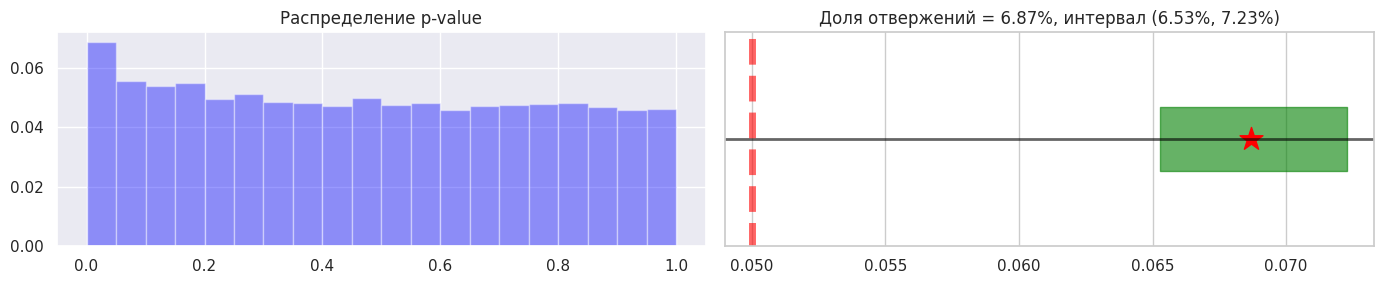

In [12]:
n_iter = 20000
alpha = 0.05

AA_test(test=relative_ttest, 
        generate_sample=generate_data,
        sample_size=300,
        n_iter=n_iter,
        alpha=alpha,
        show_pvals=True
);

Корректно ли применять критерий на данных магазина? Постройте также гистограмму значений p-value.

Как видно, применение некорректно. Истинная доля отвержений выше, чем указанный уровень значимости. Из гистограммы выше видно, что есть скачок распределения при малых p

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 5556fb0f609c015dfc23b008da0ed82f -->
**2.** С помощью проведения AB-теста по историческим данным оцените мощность теста для разных значений эффекта. Схема проведения аналогична предыдущему пункту, но к тестовой группе нужно добавить положительное смещение.

При добавлении искусственного смещения рекомендуется также добавлять небольшой шум для каждого пользователя. Поясните, для чего это может быть полезно.

Это может быть полезно для более честной оценки мощности, так мы проверяем устойчивость теста. Не забываю, что добавлять в общем случае нужно положительную величину (добавляю процент от модуля числа покупок)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 90f00c77b37ae86263799b64f6fccb74 -->
Сделайте выводы.

In [13]:
def run_experiments(test, generate_sample, sample_size, add_effect,
            effects=[0],
            n_iter=10000, alpha=0.05):    
    '''
    Проведение серии AB-тестов на исторических данных
   
    Аргументы:
    test -- статистический критерий
    generate_sample -- функция для семплирования/генерации выборок
    sample_size -- размер выборки
    add_effect -- функция для искусственного добавления эффекта в тестовую выборку
    data -- исторические данные, на которых запускаем АА-тест. 
        None, если используем искусственные данные
    effect_arr -- массив искусственно добавляемых эффектов
    n_iter -- количество итераций
    alpha -- теоретический уровень значимости

    Возвращает:
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    '''

    n_rejects = np.zeros(len(effects))  # количество отвержений H_0

    # Проведение экспериментов
    for num_effect, effect in enumerate(tqdm(effects)):
        for _ in range(n_iter):
            # Генерируем выборки
            x, y = generate_sample(sample_size)
            # Добавляем эффект
            x = add_effect(x, effect)    
            # Применияем критерий
            n_rejects[num_effect] += (test(x, y)[1] < alpha)

    # Реальная мощность
    real_power, left_power, right_power = estimate_reject_prob(n_rejects, n_iter)
    # Отрисовка мощности
    draw_power(effects, real_power, left_power, right_power)
    return real_power, (left_power, right_power)


def add_effect(x, effect_percent, dispersion=0.1):
    '''
    Функция искусственного добавления эффекта в тестовую выборку

    Аргументы:
    x -- выборка
    effect_percent -- средний процент изменения
    dispersion -- относительная дисперсия

    Возвращает:
    x -- выборка с добавленным эффектом
    '''

    random_factors = np.random.uniform(1 - dispersion, 1 + dispersion, size=len(x))
    effect = np.abs(x) * effect_percent * random_factors 
    
    return x + effect


def draw_power(effects, real_power, left_power, right_power, title='График мощности'):
    '''
    Построение и отрисовка графика мощности критерия.
   
    Аргументы:
    effects -- сетка эффектов
    real_alpha -- оценка реальной мощности
    left_alpha, right_alpha -- границы соотв. дов. интервала
    title -- заголовок графика
    '''

    plt.figure(figsize=(10, 4))
    plt.plot(effects, real_power, color='blue', label='Мощность')
    plt.fill_between(effects, left_power, right_power, alpha=0.3, color='blue', 
                     label='Дов. интервал мощности')
    plt.hlines(0.8, effects[0], effects[-1], color='black',
               label='Мощность 0.8 (пересечение - MDE)')
    plt.legend()
    plt.xlabel('Размер эффекта')
    plt.ylabel('Мощность')
    plt.title(title)
    plt.show()

Запуск

  0%|          | 0/11 [00:00<?, ?it/s]

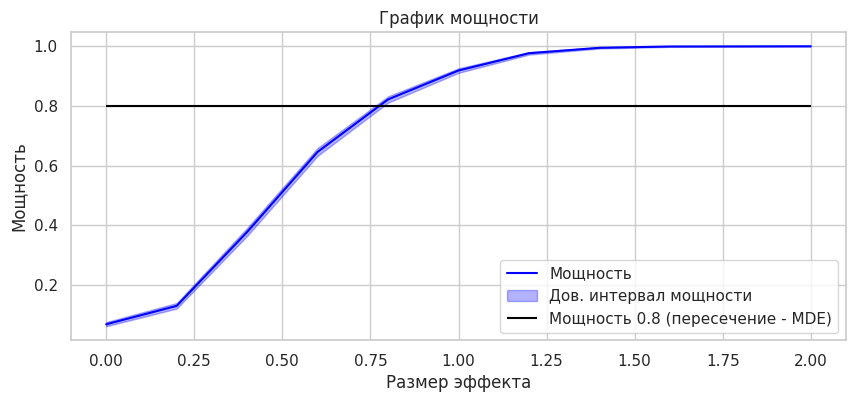

In [14]:
n_iter = 5000
alpha = 0.05

run_experiments(test=relative_ttest, 
        generate_sample=generate_data,
        sample_size=300,
        effects=np.linspace(0, 2, 11),
        add_effect=add_effect,
        n_iter=n_iter,
        alpha=alpha,
);

График мощности имеет вполне адекватный вид. Выборка размером 300 позволяем задетектировать эффект порядка 0.75 (что соответствует 75%) достаточно уверенно. Критерий слишком слабый (обычно 75% слишком большой эффект, требуется детектировать меньший), поэтому требуется более подходящий критерий, либо больший размер выборки. Впрочем, иногда и 75% может оказаться достаточным MDE.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4e95cc9146338b26732f892ba3d091bd -->
---
### Задача 6.

Рассмотрим t-test в абсолютной и относительной постановке. При использовании данных критериев предполагается, что статистика критерия (не сама выборка) приближенно имеет нормальное распределение. Но на практике ее распределение может значительно отличаться от нормального. В таком случае на помощь может прийти бутстреп. 

Опишите процедуру реализации с помощью бутстрепа критериев на основе статистик из t-test в абсолютной и относительной постановке. Необходимо посчитать статистику критерия, доверительный интервал и p-value. 

*Примечание.* Бутстрепом необходимо получить выборку статистик критерия, и затем посчитать необходимые характеристики, а не запускать много раз стандартный t-test.

**Описание:** 

$B$ число раз генерируем бутстрепную выборку, для каждой из них считаем статистику из $t-test$ на первых паре выборок из первых N/2 значений и из последних N/2.

Затем строим доверительный интервал на основе квантилей полученных статистик (2.5%-квантиль и 97.5%-квантиль для ДИ уровня доверия 95% при двусторонней альтернативы, либо [0, 5] или [95, 1] при односторонних)

P-value статистики $t$ считаем как долю статистик, имеющих такое же или более экстремальное значение из бустрепных статистик (в зависимости от альтернативы).

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- efb009736981955ae3ebae7fbefdb42d -->
Сколько бутстрепных выборок необходимо взять?

**Ответ:**
Хорошо бы оценивать P-value хотя бы с точностью до 0.01 (потому что решение об отвержении происходит при сравнении 0.05), а так как интервал уменьшается как 1/sqrt(N) - хорошей оценкой на $N$ будет (1/0.01) ** 2 = 10_000. В реальности может оказаться достаточным и несколько тысяч.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 45a00cfc8caab19f1f2860993ee2450e -->
Какие основные преимущества и недостатки использования бутстрепных критериев?

**Ответ:** 

Преимущества:

Рассчет математически прост (не нужны какие то дополнительные математические соображения), а потому гибок к распределениям или статистикам

Недостатки:

Требуется много вычислений

Может оказаться нестабильным при выбросах

Требуется достаточно большая выборка

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 88f53128fa57481639acbacc9518da3a -->
Реализуйте эту процедуру.

Определение статистик

In [15]:
def relative_tstat(x, y):
    '''
    Рассчет статистики для относительного t-test'а.
    
    Аргументы:
    x, y -- выборки 
    
    Возвращает:
    stat -- статистика критерия
    '''
    x_mean = x.mean()
    y_mean = y.mean()
    
    stat = x_mean / y_mean - 1

    return stat

def absolute_tstat(x, y):
    '''
    Рассчет статистики для абсолютного t-test'а.
    
    Аргументы:
    x, y -- выборки 
    
    Возвращает:
    stat -- статистика критерия
    '''
    x_mean = x.mean()
    y_mean = y.mean()
    pooled_std = np.sqrt(((x.var(ddof=1) / len(x)) + (y.var(ddof=1) / len(y))))
    
    stat = (x_mean - y_mean) / pooled_std

    return stat

Бустреп и p-value

In [16]:
def compute_bootstrap_stats(data, B=5000, stat_func=relative_tstat):
    '''
    Рассчет бутстрепных статистик.
    
    Аргументы:
    data -- данные
    B -- количество бутстрепных выборок
    stat_func -- функция для расчета статистики критерия
    
    Возвращает:
    boot_stats -- массив рассчитанных статистик
    '''
    boot_samples = [np.random.choice(data, size=len(data), replace=True) for _ in range(B)]
    n1 = len(boot_samples[0]) // 2
    boot_stats = []
    for sample in boot_samples:
        boot_sample1 = sample[:n1]
        boot_sample2 = sample[n1:]
        boot_stat = stat_func(boot_sample1, boot_sample2)
        boot_stats.append(boot_stat)
    
    return np.array(boot_stats)

def compute_p_value(boot_stats, stat_original, alternative="two-sided"):
    '''
    Рассчет p-value на основе бутстрепных статистик для разных альтернатив.
    
    Аргументы:
    boot_stats -- массив бутстрепных статистик
    stat_original -- исходная статистика критерия
    alternative -- альтернатива: "two-sided", "greater", "less"
    
    Возвращает:
    p-value
    '''
    if alternative == "two-sided":
        return 2 * min(
            np.mean(boot_stats >= stat_original),
            np.mean(boot_stats <= stat_original)
        )
    elif alternative == "greater":
        return np.mean(boot_stats >= stat_original)
    elif alternative == "less":
        return np.mean(boot_stats <= stat_original)
    else:
        raise ValueError("Недопустимое значение alternative. Используйте 'two-sided', 'greater' или 'less'.")

def bootstrap_t_test(boot_stats, x, y, stat_func=relative_tstat, alternative='two-sided'):
    '''
    Оценка статистики критерия, доверительного интервала и p-value на основе бутстрепных выборок.
    
    Аргументы:
    boot_stats -- статистики бутстрепных выборок
    x -- тестовая выборка
    y -- контрольная выборка
    stat_func -- функция для расчета статистики критерия
    alternative -- вид альтернативы (по умолчанию двусторонняя). Возможные знаечения:
     'two-sided', 'greater' или 'less'
    
    Возвращает:
    Словарь с оригинальной статистикой, доверительным интервалом и p-value
    '''
    
    if alternative == "two-sided":
        ci_lower, ci_upper = np.percentile(boot_stats, [2.5, 97.5])
    elif alternative == "greater":
        ci_lower, ci_upper = np.percentile(boot_stats, [5, 100])
    elif alternative == "less":
        ci_lower, ci_upper = np.percentile(boot_stats, [0, 95])
    else:
        raise ValueError("Недопустимое значение alternative. Используйте 'two-sided', 'greater' или 'less'.")
    
    stat_original = stat_func(x, y)
    
    p_value = compute_p_value(boot_stats, stat_original)
    
    return {
        "stat_original": stat_original,
        "ci": (ci_lower, ci_upper),
        "p_value": p_value
    }



Функция для красивой печати

In [17]:
def print_statistics(stat_dict):
    stat_original = stat_dict["stat_original"]
    ci_lower, ci_upper = stat_dict["ci"]
    p_value = stat_dict["p_value"]
    
    print(f"Statistics: {stat_original:.2f}")
    print(f"Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")
    print(f"P-value: {p_value:.2f}")

np.random.seed(42)
data = np.random.normal(0, 1, 60)

x = data[:20]
y = np.random.normal(1, 1, 60)
boot_stats = compute_bootstrap_stats(data, B=5000, stat_func=absolute_tstat)
result = bootstrap_t_test(boot_stats, x=x, y=y, stat_func=absolute_tstat,
                          alternative="two-sided")
print_statistics(result)

Statistics: -4.73
Confidence Interval: (-1.97, 1.99)
P-value: 0.00


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 5c08e643e274d6398d17c296ab213693 -->
Проведите исследование реализованных критериев  
* аналогично исследованию относительного t-test'а с занятия, 
* для данных из предыдущей задачи. 

В каждом случае постройте также график бутстрепной оценки распределения статистики и сравните его с нормальным распределением.

Вспомогательные функции

In [26]:
def vizualize_distributions(distr1, distr2):
    '''
    Функция для отрисовки распределений, из которых генерируются 
    искусственные данные
    
    Аргументы:
    distr1, distr2 -- распределения
    '''
    
    plt.figure(figsize=(5, 3))
    for i, d, label in zip([0, 1], [distr1, distr2], ['A', 'B']):
        grid = np.linspace(d.ppf(0.005) - 0.2, d.ppf(0.995) + 0.2, 1000)
        plt.plot(grid, d.pdf(grid), label=label, lw=4 - 2 * i)
    plt.legend()
    plt.title('Плотности выборок')

def generate_data_from_distrs(distr1, distr2, sample_size=1000):
    '''
    Генерация искусственных данных из распределений
    
    Аргументы:
    distr1, distr2 -- распределения данных теста и контроля
    sample_size -- размер выборок

    Возвращает:
    x, y -- выборки
    '''
    x = distr1.rvs(size=sample_size)
    y = distr2.rvs(size=sample_size)
    return x, y

Рассчет для гамма распределения (искусствено сгенерированные)

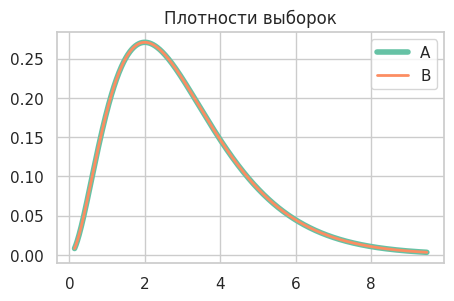

In [25]:
vizualize_distributions(sps.gamma(a=3), sps.gamma(a=3))

Посчитаем распределение статистик при нулевой гипотезе. Оно соответствует нормальному

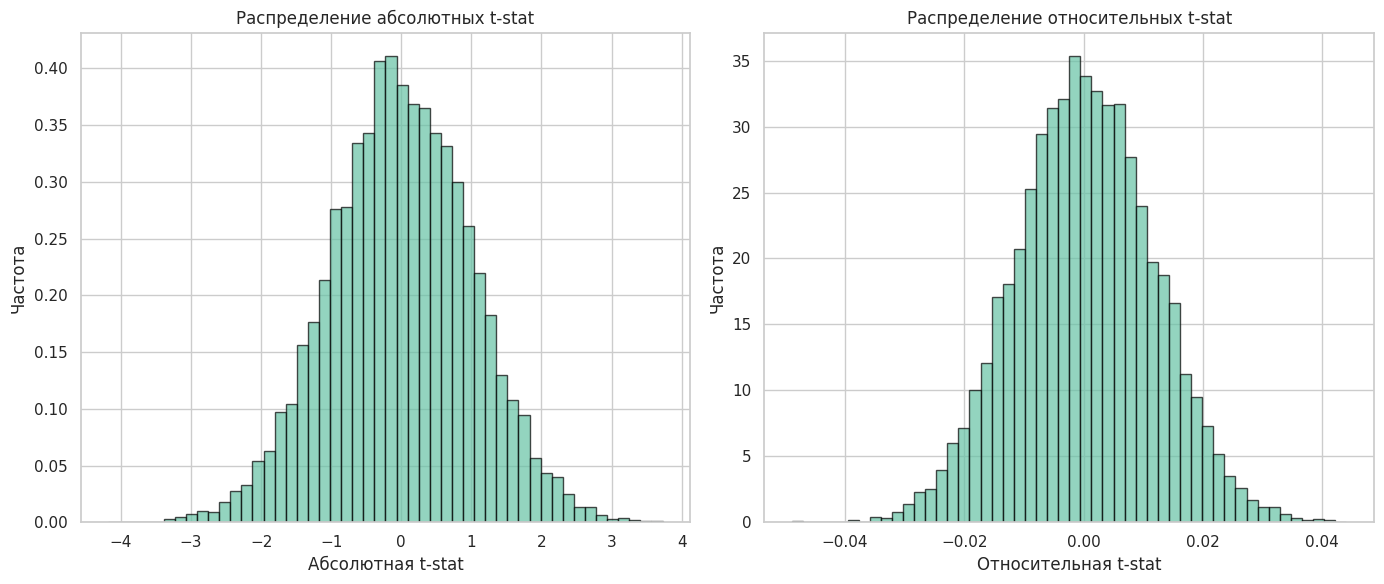

In [71]:
data = sps.gamma(a=3).rvs(size=10000)

boot_stats_abs = compute_bootstrap_stats(data, B=10000, stat_func=absolute_tstat)
boot_stats_rel = compute_bootstrap_stats(data, B=10000, stat_func=relative_tstat)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(boot_stats_abs, bins=50, edgecolor='black', alpha=0.7, density=True)
plt.title("Распределение абсолютных t-stat")
plt.xlabel("Абсолютная t-stat")
plt.ylabel("Частота")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(boot_stats_rel, bins=50, edgecolor='black', alpha=0.7, density=True)
plt.title("Распределение относительных t-stat")
plt.xlabel("Относительная t-stat")
plt.ylabel("Частота")
plt.grid(True)

plt.tight_layout()
plt.show()

Для абсолютного t-test: (размеры выборок 100 и 5000)

  0%|          | 0/5000 [00:00<?, ?it/s]

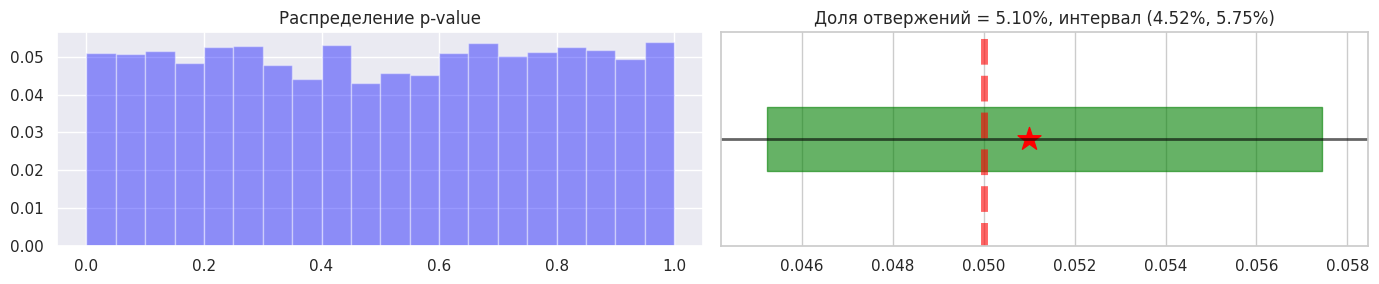

  0%|          | 0/5000 [00:00<?, ?it/s]

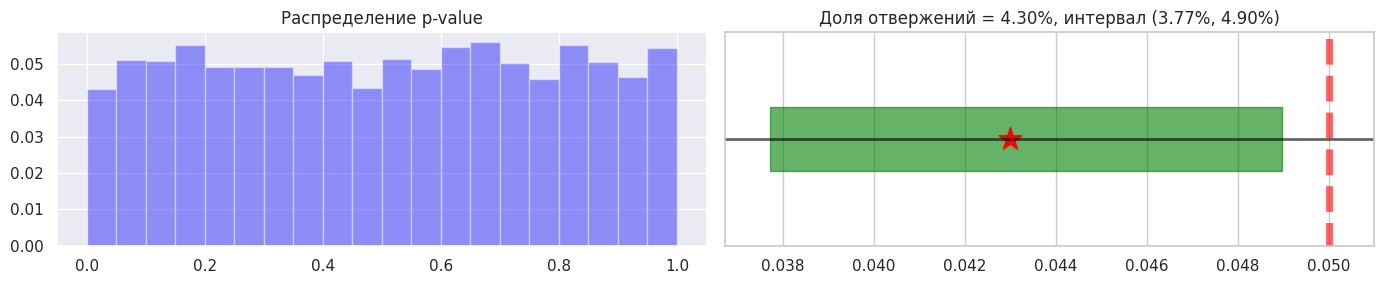

(0.043, (0.03771925108777711, 0.04898242849000511))

In [72]:
AA_test(
    test=lambda x, y: [0, bootstrap_t_test(boot_stats_abs, x, y,
                                           stat_func=absolute_tstat)["p_value"]],  
    generate_sample=lambda sample_size: generate_data_from_distrs(
        sps.gamma(a=3), sps.gamma(a=3), sample_size=sample_size
    ),  
    sample_size=100,  
    n_iter=n_iter,  
    alpha=alpha,  
    show_pvals=True  
)
AA_test(
    test=lambda x, y: [0, bootstrap_t_test(boot_stats_abs, x, y,
                                           stat_func=absolute_tstat)["p_value"]],  
    generate_sample=lambda sample_size: generate_data_from_distrs(
        sps.gamma(a=3), sps.gamma(a=3), sample_size=sample_size
    ),  
    sample_size=5000,  
    n_iter=n_iter,  
    alpha=alpha,  
    show_pvals=True  
)


Для относительного (размеры выборок 100 и 5000):

  0%|          | 0/5000 [00:00<?, ?it/s]

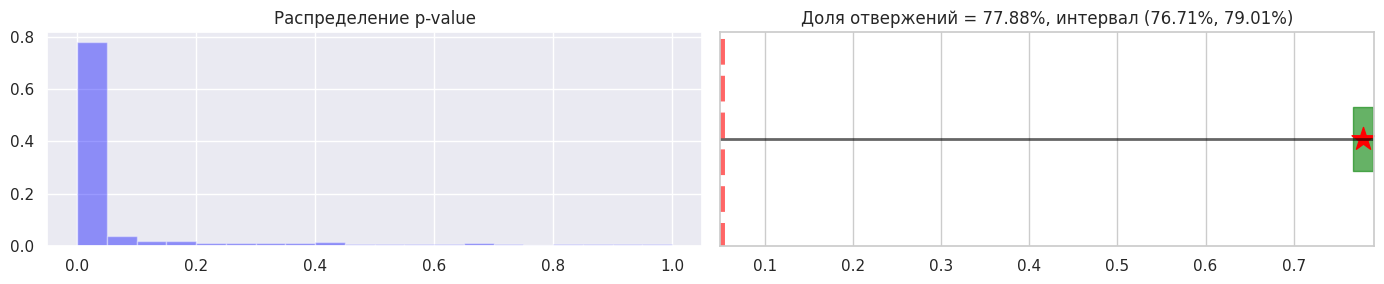

  0%|          | 0/5000 [00:00<?, ?it/s]

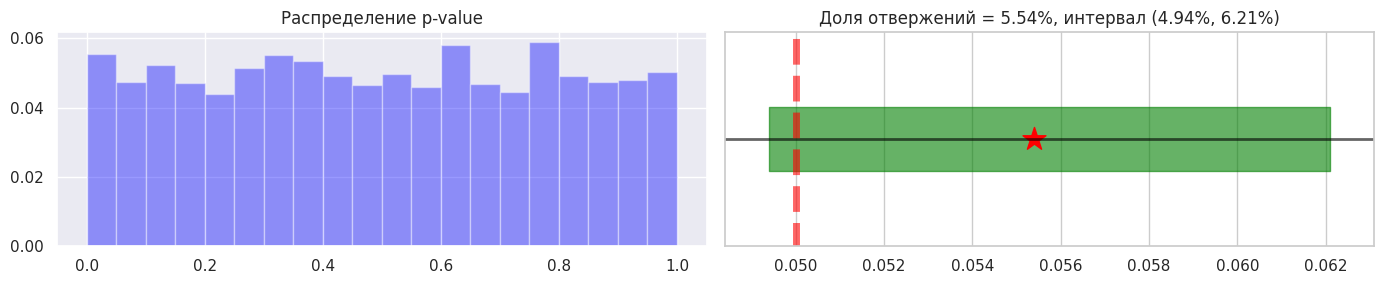

(0.0554, (0.049393802093284464, 0.062088838476260344))

In [73]:
AA_test(
    test=lambda x, y: [0, bootstrap_t_test(boot_stats_rel, x, y,
                                           stat_func=relative_tstat)["p_value"]],  
    generate_sample=lambda sample_size: generate_data_from_distrs(
        sps.gamma(a=3), sps.gamma(a=3), sample_size=sample_size
    ),  
    sample_size=100,  
    n_iter=n_iter,  
    alpha=alpha,  
    show_pvals=True  
)
AA_test(
    test=lambda x, y: [0, bootstrap_t_test(boot_stats_rel, x, y,
                                           stat_func=relative_tstat)["p_value"]],  
    generate_sample=lambda sample_size: generate_data_from_distrs(
        sps.gamma(a=3), sps.gamma(a=3), sample_size=sample_size
    ),  
    sample_size=5000,  
    n_iter=n_iter,  
    alpha=alpha,  
    show_pvals=True  
)


Теперь мощности для абсолютного и относительного:

Для абсолютного t-stat:


  0%|          | 0/9 [00:00<?, ?it/s]

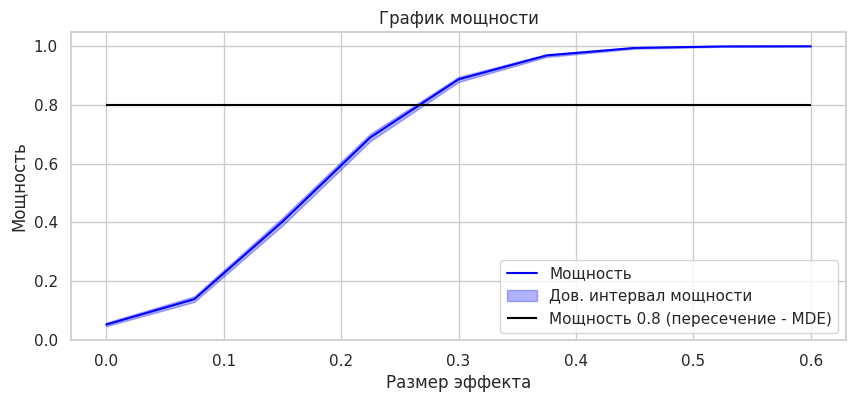

Для относительного t-stat:


  0%|          | 0/9 [00:00<?, ?it/s]

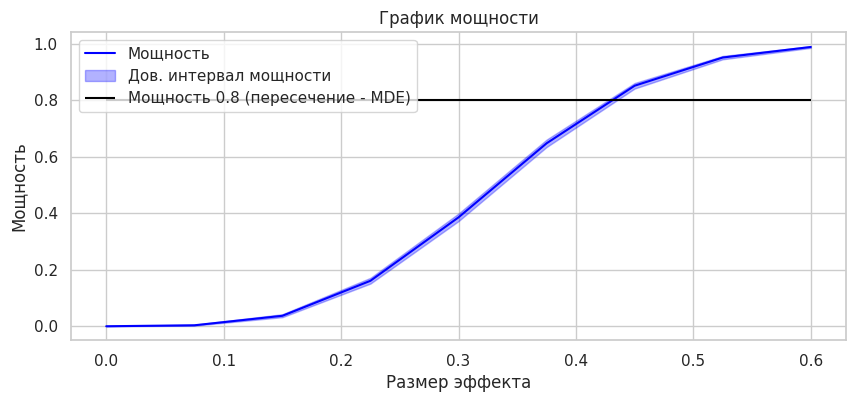

(array([0.    , 0.0034, 0.037 , 0.161 , 0.3856, 0.6478, 0.8518, 0.9516,
        0.989 ]),
 (array([0.        , 0.00212394, 0.03211328, 0.15107359, 0.37220131,
         0.63445143, 0.84168182, 0.94529692, 0.98571036]),
  array([7.67701945e-04, 5.43854478e-03, 4.25976144e-02, 1.71446916e-01,
         3.99174337e-01, 6.60921640e-01, 8.61378026e-01, 9.57209696e-01,
         9.91538828e-01])))

In [61]:
print(f"Для абсолютного t-stat:")

run_experiments(
        test=lambda x, y: [0, bootstrap_t_test(boot_stats_abs, x, y,
                                           stat_func=absolute_tstat)["p_value"]],  
        generate_sample=lambda sample_size: generate_data_from_distrs(
        sps.gamma(a=3), sps.gamma(a=3), sample_size=sample_size
        ),
        sample_size=100,
        effects=np.linspace(0, 0.6, 9),
        add_effect=add_effect,
        n_iter=n_iter,
        alpha=alpha,
)

print(f"Для относительного t-stat:")

run_experiments(
        test=lambda x, y: [0, bootstrap_t_test(boot_stats_rel, x, y,
                                           stat_func=relative_tstat)["p_value"]],  
        generate_sample=lambda sample_size: generate_data_from_distrs(
        sps.gamma(a=3), sps.gamma(a=3), sample_size=sample_size
        ),
        sample_size=100,
        effects=np.linspace(0, 0.6, 9),
        add_effect=add_effect,
        n_iter=n_iter,
        alpha=alpha,
)

Теперь на исторических данных. Распределение статистики. У относительной чуть хвост вправо

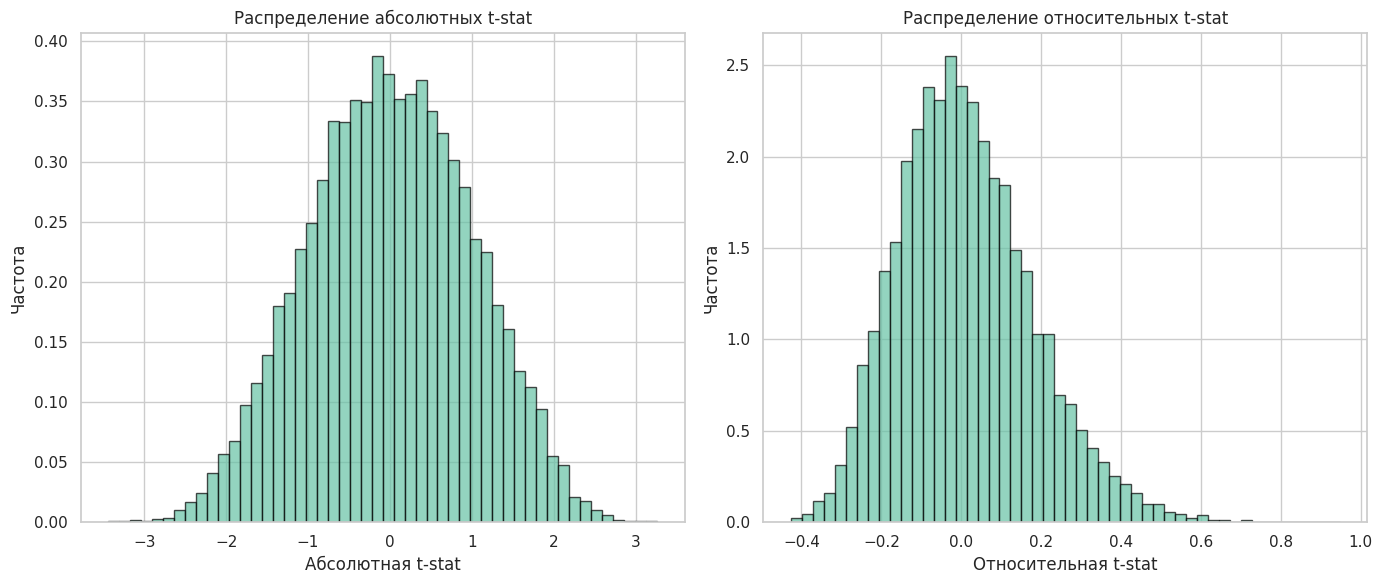

In [90]:
data = generate_data(sample_size=300)
data = np.concatenate((data[0].values, data[1].values))

boot_stats_abs = compute_bootstrap_stats(data, B=10000, stat_func=absolute_tstat)
boot_stats_rel = compute_bootstrap_stats(data, B=10000, stat_func=relative_tstat)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(boot_stats_abs, bins=50, edgecolor='black', alpha=0.7, density=True)
plt.title("Распределение абсолютных t-stat")
plt.xlabel("Абсолютная t-stat")
plt.ylabel("Частота")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(boot_stats_rel, bins=50, edgecolor='black', alpha=0.7, density=True)
plt.title("Распределение относительных t-stat")
plt.xlabel("Относительная t-stat")
plt.ylabel("Частота")
plt.grid(True)

plt.tight_layout()
plt.show()

Теперь AA тест для абсолютной

  0%|          | 0/20000 [00:00<?, ?it/s]

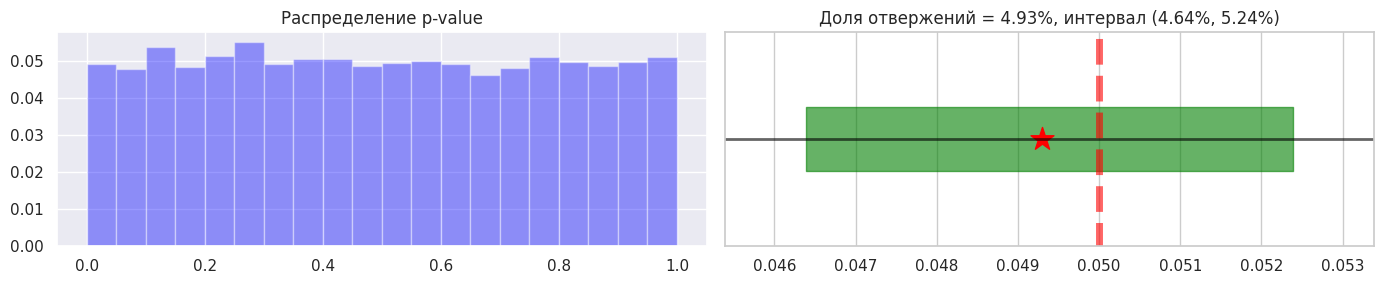

(0.0493, (0.0463851964782741, 0.05238790482269861))

In [94]:
AA_test(
    test=lambda x, y: [0, bootstrap_t_test(boot_stats_abs, x, y,
                                           stat_func=absolute_tstat)["p_value"]],  
    generate_sample=generate_data,
    sample_size=300,  
    n_iter=n_iter,  
    alpha=alpha,  
    show_pvals=True  
)

AA тест для относительной

  0%|          | 0/20000 [00:00<?, ?it/s]

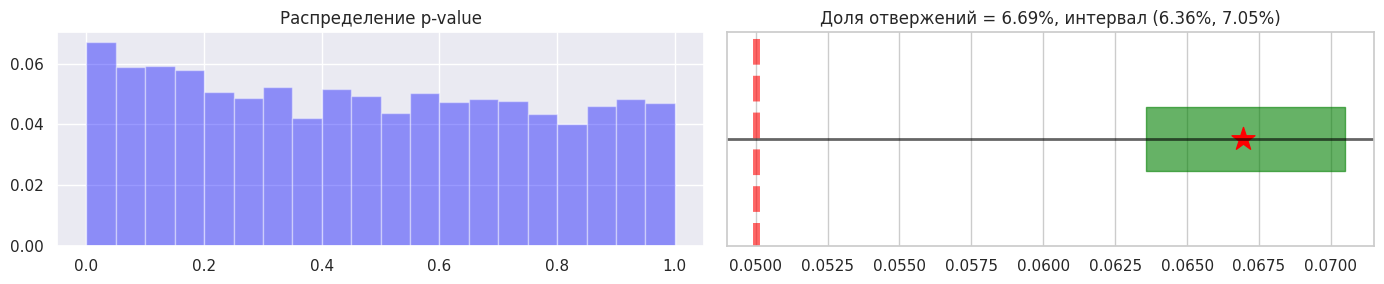

(0.06695, (0.06356863151305922, 0.070497690915133))

In [95]:
AA_test(
    test=lambda x, y: [0, bootstrap_t_test(boot_stats_rel, x, y,
                                           stat_func=relative_tstat)["p_value"]],  
    generate_sample=generate_data,
    sample_size=300,  
    n_iter=n_iter,  
    alpha=alpha,  
    show_pvals=True  
)

Теперь мощности

Для абсолютного t-stat:


  0%|          | 0/9 [00:00<?, ?it/s]

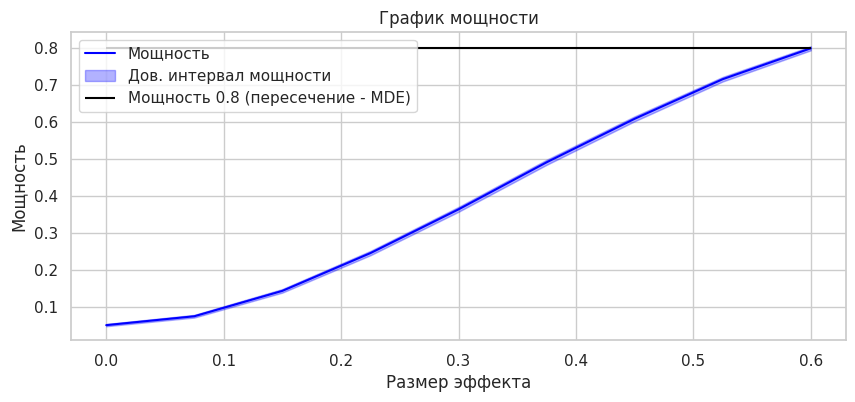

Для относительного t-stat:


  0%|          | 0/9 [00:00<?, ?it/s]

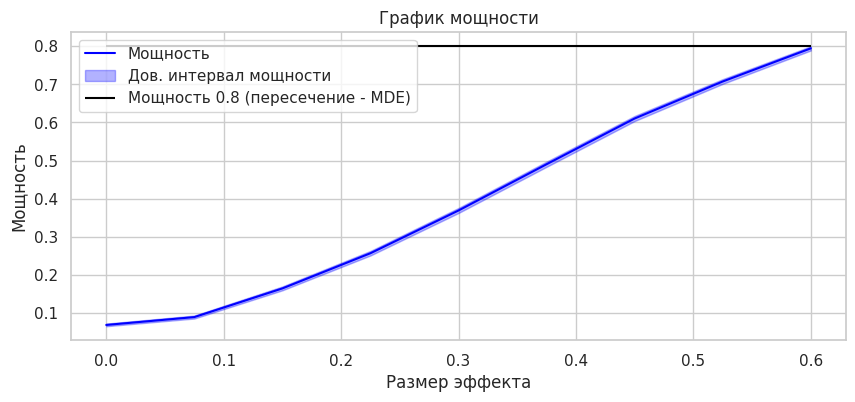

(array([0.068  , 0.08865, 0.164  , 0.25645, 0.36875, 0.4903 , 0.61045,
        0.7077 , 0.79475]),
 (array([0.06459335, 0.08478932, 0.15893295, 0.2504453 , 0.36208928,
         0.48337431, 0.60367107, 0.70135723, 0.7890962 ]),
  array([0.07157257, 0.09266867, 0.1691961 , 0.26254824, 0.37546112,
         0.49722941, 0.61718651, 0.71396299, 0.80029059])))

In [96]:
print(f"Для абсолютного t-stat:")

run_experiments(
        test=lambda x, y: [0, bootstrap_t_test(boot_stats_abs, x, y,
                                           stat_func=absolute_tstat)["p_value"]],  
        generate_sample=generate_data,
        sample_size=300,
        effects=np.linspace(0, 0.6, 9),
        add_effect=add_effect,
        n_iter=n_iter,
        alpha=alpha,
)

print(f"Для относительного t-stat:")

run_experiments(
        test=lambda x, y: [0, bootstrap_t_test(boot_stats_rel, x, y,
                                           stat_func=relative_tstat)["p_value"]],  
        generate_sample=generate_data,
        sample_size=300,
        effects=np.linspace(0, 0.6, 9),
        add_effect=add_effect,
        n_iter=n_iter,
        alpha=alpha,
)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 9c487359bc003d9d84dcc4c99c6a588d -->
Не забывайте про выводы.

Итого:

Мы получили распредление бустрепное распределение абсолютной и относительной t-stat. Они оказались близки к нормальным. В некоторых задачах это может быть и не так, и бустреп даст выигрыш, ведь даст приближение истинного распределения статистики.

**Корректность**

Распределение относительной t-stat зависит от размера выборки, поэтому графики с ней оказались сильно плохи при маленьких размерах выборок ~100 - например видно различие p-value - истинное значение оказалось сильно завышено (бустреп рассчитывает распределение статистики для выборок размера ~5000) и на синтетических данных, и на реальных, поэтому есть проблемы с корректностью. Это можно починить, если бустрепить под нужный размер выборки, но для этого требуется еще больше вычислений.

Абсолютный t-test оказался корректным на исторических и реальных данных, при этом распределение статистики слабо зависит от размера выборки.

**Мощности**

Абсолютный t-test выигрывает в мощности на исторических данных. Он несколько выигрывает на реальных (поскольку реальная мощность относительного t-test завышена)

**Вывод**

На практике, при более аккуратном использовании, относительный t-stat может оказаться мощнее, и его использование зависит от задачи. Однако, ясно, что у него есть свои ограничения - в том числе положительность метрик (иначе делим на ноль) - в то время как абсолютный кажется более универсальным.